接着上篇继续后面两个章节，数组变形和数组计算。
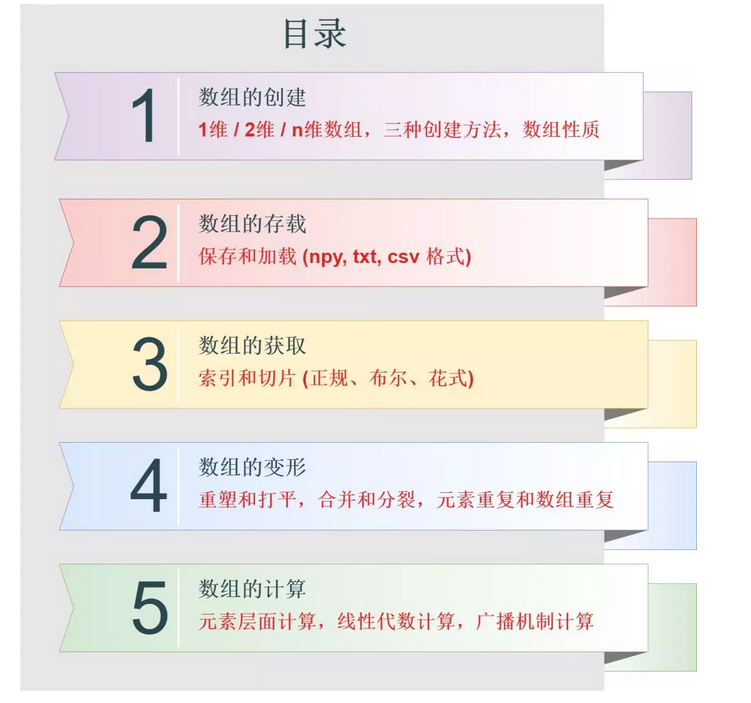

## 数组的变形
本节介绍四大类数组层面上的操作，具体有

* 重塑 (reshape) 和打平 (ravel, flatten)
* 合并 (concatenate, stack) 和分裂 (split)
* 重复 (repeat) 和拼接 (tile)
* 其他操作 (sort, insert, delete, copy)

### 4.1 重塑和打平
重塑 (reshape) 和打平 (ravel, flatten) 这两个操作仅仅只改变数组的维度

* 重塑是从低维到高维
* 打平是从高维到低维

#### 重塑
用reshape()函数将一堆数组arr重塑成二维数组。

In [3]:
import numpy as np
arr = np.arange(12)
print(arr)
print(arr.reshape((4, 3)))

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


当你重塑高维矩阵时，不想花时间算某一维度的元素个数时，可以用「-1」取代，程序会自动帮你计算出来。比如把 12 个元素重塑成 (2, 6)，你可以写成 (2,-1) 或者 (-1, 6)。

In [6]:
print(arr.reshape((2, -1)))
print(arr.reshape((-1, 4)))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### 打平
用ravel()或flatten()函数将二维数组arr打平成一维数组

In [10]:
arr = np.arange(12).reshape((4,3))
print(arr)

ravel_arr = arr.ravel()
print(ravel_arr)

flatten_arr = arr.flatten()
print(flatten_arr)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


问题：
1. 思考：为什么重塑后的数组不是

    [[ 0 4 8]
 [ 1 5 9]
  [ 2 6 10]
   [ 3 7 11]]
   
2. 思考：为什么打平后的数组不是

    [ 0 3 6 9 1 4 7 10 2 5 8 11]

要回答本节两个问题，需要了解 numpy 数组在内存块的存储方式。

#### 行主序和列主序

行主序 (row-major order) 指每行的元素在内存块中彼此相邻，而列主序 (column-major order) 指每列的元素在内存块中彼此相邻。

在众多计算机语言中，

* 默认行主序的有 C 语言(下图 order=‘C’ 等价于行主序)
* 默认列主序的有 Fortran 语言(下图 order=‘F’ 等价于列主序)

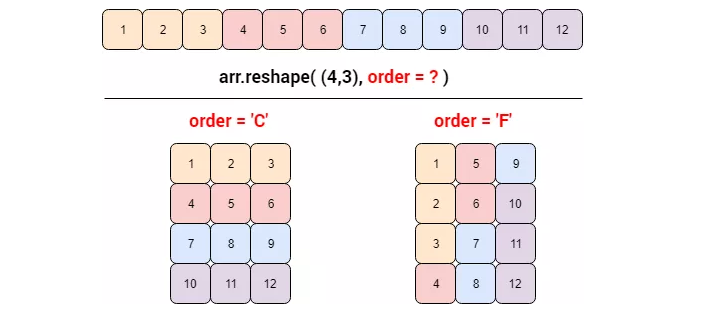

在 numpy 数组中，默认的是 **行主序**，即 order ='C'。现在可以回答本节那两个问题了。



如果你真的想在「重塑」和「打平」时用列主序，只用把 order 设为 'F'，以重塑举例：

In [17]:
print(arr.reshape((4,3), order='F'))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


「打平」有两个函数 ravel() 或 flatten()？它们的区别在哪里？

#### * 知识点
函数 ravel() 或 flatten() 的不同之处是

* ravel() 按「行主序」打平时没有复制原数组，按「列主序」在打平时复制了原数组
* flatten() 在打平时复制了原数组

用代码验证一下，首先看 flatten()，将打平后的数组 flatten 第一个元素更新为 10000，并没有对原数组 arr 产生任何影响 (证明 flatten() 是复制了原数组)

In [20]:
arr = np.arange(6).reshape(2,3)
print(arr)

flatten = arr.flatten()
print(flatten)
flatten[0] = 10000
print(arr)

[[0 1 2]
 [3 4 5]]
[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


再看 ravel() 在「列主序」打平，将打平后的数组 ravel_F 第一个元素更新为 10000，并没有对原数组 arr 产生任何影响 (证明 ravel(order='F') 是 **复制了** 原数组)

In [24]:
ravel_F = arr.ravel(order='F')
print(ravel_F)
ravel_F[0] = 10000
print(ravel_F)
print(arr)

[0 3 1 4 2 5]
[10000     3     1     4     2     5]
[[0 1 2]
 [3 4 5]]


最后看 ravel() 在「行主序」打平，将打平后的数组 ravel_C 第一个元素更新为 10000，原数组 arr[0][0] 也变成了 10000 (证明 ravel() 没有复制原数组)

In [25]:
ravel_C = arr.ravel(order='C')
ravel_C[0] = 10000
print(ravel_C)
print(arr)

[10000     1     2     3     4     5]
[[10000     1     2]
 [    3     4     5]]


### 4.2 合并和分裂
合并 (concatenate, stack) 和分裂 (split) 这两个操作仅仅只改变数组的分合

* 合并是多合一
* 分裂是一分多

#### 合并
使用「合并」函数有三种选择

1. 有通用的 concatenate
2. 有专门的 vstack, hstack, dstack
3. 有极简的 r_, c_

用下面两个数组来举例：

In [28]:
arr1 = np.array([[1, 2, 3],[4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])


* concatenate

In [32]:
np.concatenate([arr1, arr2], axis=0)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [33]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

在 concatenate() 函数里通过设定轴，来对数组进行竖直方向合并 (轴 0) 和水平方向合并 (轴 1)。 

* vstack, hstack, dstack
通用的东西是好，但是可能效率不高，NumPy 里还有专门合并的函数

* vstack：v 代表 vertical，竖直合并，等价于 concatenate(axis=0)
* hstack：h 代表 horizontal，水平合并，等价于 concatenate(axis=1)
* dstack：d 代表 depth-wise，按深度合并，深度有点像彩色照片的 RGB 通道

一图胜千言：
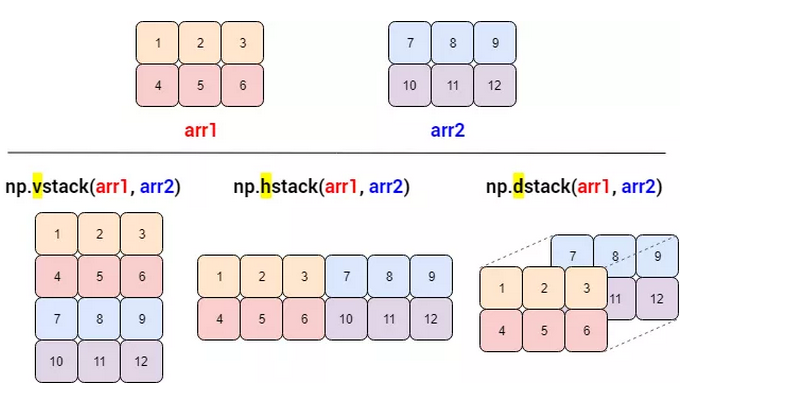
用代码验证一下：

In [37]:
print( np.vstack((arr1, arr2)) )
print('- '*10)
print( np.hstack((arr1, arr2)) )
print('- '*10)
print( np.dstack((arr1, arr2)) )

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
- - - - - - - - - - 
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
- - - - - - - - - - 
[[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]


和 vstack, hstack 不同，dstack 将原数组的维度增加了一维。


In [38]:
np.dstack((arr1, arr2)).shape

(2, 3, 2)

* r_, c_
此外，还有一种更简单的在竖直和水平方向合并的函数，r_() 和 c_()。

In [41]:
print( np.r_[arr1,arr2] )
print('- '*10)
print( np.c_[arr1,arr2] )

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
- - - - - - - - - - 
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


除此之外，r_() 和 c_() 有什么特别之处么？(如果完全和 vstack() 和hstack() 一样，那也没有存在的必要了)

#### * 知识点
1. 参数可以切片


In [42]:
print(np.r_[-2:2:1, [0]*3, 5, 6])

[-2 -1  0  1  0  0  0  5  6]


2. 第一个参数可以是控制参数，如果它用 'r' 或 'c' 字符可生成线性代数最常用的 matrix (和二维 numpy array 稍微有些不同)

In [43]:
np.r_['r', [1,2,3], [4,5,6]]

matrix([[1, 2, 3, 4, 5, 6]])

3. 第一个参数可以是控制参数，如果它写成 ‘a,b,c’ 的形式，其中

* a：代表轴，按「轴 a」来合并
* b：合并后数组维度至少是 b
* c：在第 c 维上做维度提升

看不懂吧？没事，先用程序感受一下：

In [44]:
print( np.r_['0,2,0', [1,2,3], [4,5,6]] )
print( np.r_['0,2,1', [1,2,3], [4,5,6]] )
print( np.r_['1,2,0', [1,2,3], [4,5,6]] )
print( np.r_['1,2,1', [1,2,3], [4,5,6]] )

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
[[1 2 3 4 5 6]]


还看不懂吧 (但至少知道完事后的维度是 2，即字符串 ‘a,b,c’ 的 b 起的作用 )？没事，我再画个图。
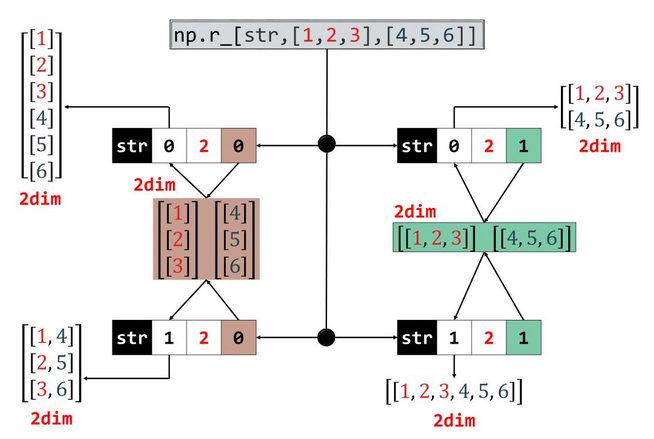
还没懂彻底吧？没事，我再解释下。

字符串 ‘a,b,c’ 总共有四类，分别是

* '0, 2, 0'
* '0, 2, 1'
* '1, 2, 0'
* '1, 2, 1'

函数里两个数组 [1,2,3], [4,5,6] 都是一维

* c = 0 代表在「轴 0」上升一维，因此得到 [[1],[2],[3]] 和 [[4],[5],[6]] 
* c = 1 代表在「轴 1」上升一维，因此得到 [[1,2,3]] 和 [[4,5,6]]

接下来如何合并就看 a 的值了

* a = 0, 沿着「轴 0」合并
* a = 1, 沿着「轴 1」合并

#### 分裂
使用「分裂」函数有两种选择

* 有通用的 split
* 有专门的 hsplit, vsplit

用下面数组来举例：

In [46]:
arr = np.arange(25).reshape(5, -1)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

* split
和 concatenate() 函数一样，我们可以在 split() 函数里通过设定轴，来对数组沿着竖直方向分裂 (轴 0) 和沿着水平方向分裂 (轴 1)。 

In [49]:
first, second , third = np.split(arr, [1,3])
print( 'The first split is', first )
print( 'The second split is', second )
print( 'The third split is', third )

The first split is [[0 1 2 3 4]]
The second split is [[ 5  6  7  8  9]
 [10 11 12 13 14]]
The third split is [[15 16 17 18 19]
 [20 21 22 23 24]]


split() 默认沿着轴 0 分裂，其第二个参数 [1, 3] 相当于是个切片操作，将数组分成三部分：

* 第一部分 - :1 (即第 1 行)
* 第二部分 - 1:3 (即第 2 到 3 行)
* 第二部分 - 3:  (即第 4 到 5 行)

* hsplit, vsplit
vsplit() 和 split(axis=0) 等价，hsplit() 和 split(axis=1) 等价。一图胜千言：
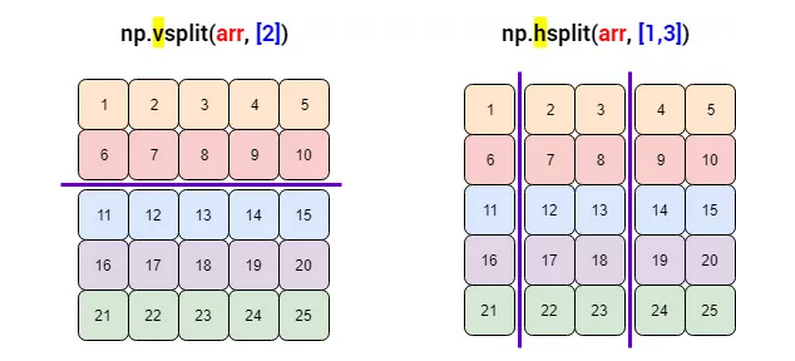
为了和上面不重复，我们只看 hsplit。

In [50]:
first, second, third = np.hsplit(arr,[1,3])
print( 'The first split is', first )
print( 'The second split is', second )
print( 'The third split is', third )

The first split is [[ 0]
 [ 5]
 [10]
 [15]
 [20]]
The second split is [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
The third split is [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]


### 4.3 重复和拼接
重复 (repeat) 和拼接 (tile) 这两个操作本质都是复制

* 重复是在元素层面复制
* 拼接是在数组层面复制

#### 重复
函数 repeat() 复制的是数组的每一个元素，参数有几种设定方法：

* 一维数组：用标量和列表来复制元素的个数
* 多维数组：用标量和列表来复制元素的个数，用轴来控制复制的行和列

* 标量

In [53]:
arr = np.arange(3)
print(arr)
print(arr.repeat(3))

[0 1 2]
[0 0 0 1 1 1 2 2 2]


标量参数 3 - 数组 arr 中每个元素复制 3 遍。

* 列表

In [54]:
print(arr.repeat([2, 3, 4]))

[0 0 1 1 1 2 2 2 2]


列表参数 [2,3,4] - 数组 arr 中每个元素分别复制 2, 3, 4 遍。

* 标量和轴

In [58]:
arr2d = np.arange(6).reshape((2, -1))
print(arr2d)
print(arr2d.repeat(2, axis=0))
print(arr2d.repeat(2, axis=1))

[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [0 1 2]
 [3 4 5]
 [3 4 5]]
[[0 0 1 1 2 2]
 [3 3 4 4 5 5]]


标量参数 2 和轴 0 - 数组 arr2d 中每个元素沿着轴 0 复制 2 遍。

* 列表和轴

In [59]:
print( arr2d.repeat([2,3,4], axis=1) )

[[0 0 1 1 1 2 2 2 2]
 [3 3 4 4 4 5 5 5 5]]


列表参数 [2,3,4] 和轴 1 - 数组 arr2d 中每个元素沿着轴 1 分别复制 2, 3, 4 遍。

#### 拼接
函数 tile() 复制的是数组本身，参数有几种设定方法：

* 标量：把数组当成一个元素，一列一列复制
* 形状：把数组当成一个元素，按形状复制

* 标量

In [60]:
arr2d = np.arange(6).reshape((2,3))
print( arr2d )
print( np.tile(arr2d,2) )

[[0 1 2]
 [3 4 5]]
[[0 1 2 0 1 2]
 [3 4 5 3 4 5]]


标量参数 2 - 数组 arr 按列复制 2 遍。

* 形状

In [61]:
print( np.tile(arr2d, (2,3)) )

[[0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]
 [0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]]


标量参数 (2,3) - 数组 arr 按形状复制 6 (2×3) 遍，并以 (2,3) 的形式展现。

### 4.4 其他操作
本节讨论数组的其他操作，包括排序 (sort)，插入 (insert)，删除 (delete) 和复制 (copy)。

#### 排序
排序包括直接排序 (direct sort) 和间接排序 (indirect sort)。

##### 直接排序

In [62]:
arr = np.array([5,3,2,6,1,4])
print( 'Before sorting', arr )
arr.sort()
print( 'After sorting', arr )

Before sorting [5 3 2 6 1 4]
After sorting [1 2 3 4 5 6]


sort()函数是按升序 (ascending order) 排列的，该函数里没有参数可以控制 order，因此你想要按降序排列的数组，只需

In [63]:
print( arr[::-1] )

[6 5 4 3 2 1]


### * 知识点
用来排序 numpy 用两种方式：

    arr.sort()
    np.sort( arr )

第一种 sort 会改变 arr，第二种 sort 在排序时创建了 arr 的一个复制品，不会改变 arr。看下面代码，用一个形状是 (3, 4) 的「二维随机整数」数组来举例，用整数是为了便于读者好观察排序前后的变化：

In [64]:
arr = np.random.randint( 40, size=(3,4) )
arr

array([[ 6, 21,  6, 20],
       [20, 16, 21,  0],
       [25,  8, 33, 15]])

第一种 arr.sort()，对第一列排序，发现 arr 的元素 **改变** 了。

In [65]:
arr[:, 0].sort() 
arr

array([[ 6, 21,  6, 20],
       [20, 16, 21,  0],
       [25,  8, 33, 15]])

第二种 np.sort(arr)，对第二列排序，但是 arr 的元素不变。

In [66]:
np.sort(arr[:,1])

array([ 8, 16, 21])

In [67]:
print( arr )

[[ 6 21  6 20]
 [20 16 21  0]
 [25  8 33 15]]


此外也可以在不同的轴上排序，对于二维数组，在「轴 0」上排序是「跨行」排序，在「轴 1」上排序是「跨列」排序。

In [68]:
arr.sort(axis=1)
print( arr )

[[ 6  6 20 21]
 [ 0 16 20 21]
 [ 8 15 25 33]]


##### 间接排序
有时候我们不仅仅只想排序数组，还想在排序过程中 **提取每个元素在原数组对应的索引(index)** ，这时 argsort() 就派上用场了。以排列下面五个学生的数学分数为例：

In [69]:
score = np.array([100, 60, 99, 80, 91])
idx = score.argsort()
print( idx )

[1 3 4 2 0]


用这个 idx 对 score 做一个「花式索引」得到 (还记得上贴的内容吗？)

In [70]:

print( score[idx] )

[ 60  80  91  99 100]


再看一个二维数组的例子。

In [71]:
arr = np.random.randint( 40, size=(3,4) )
print( arr )

[[ 1 19  7 30]
 [ 9  8  1 12]
 [16 31 10  0]]


对其第一行 arr[0] 排序，获取索引，在应用到所用行上

In [72]:
arr[:, arr[0].argsort()]

array([[ 1,  7, 19, 30],
       [ 9,  1,  8, 12],
       [16, 10, 31,  0]])

这不就是「花式索引」吗？来我们分解一下以上代码，先看看索引。

In [74]:
print( arr[0].argsort() )

[0 2 1 3]


「花式索引」来了，结果和上面一样的。

In [75]:
arr[:, [2, 0, 3, 1]]

array([[ 7,  1, 30, 19],
       [ 1,  9, 12,  8],
       [10, 16,  0, 31]])

#### 插入和删除

和列表一样，我们可以给 numpy 数组

* 用insert()函数在某个特定位置之前插入元素
* 用delete()函数删除某些特定元素

In [76]:
a = np.arange(6)
print( a )
print( np.insert(a, 1, 100) )
print( np.delete(a, [1,3]) )

[0 1 2 3 4 5]
[  0 100   1   2   3   4   5]
[0 2 4 5]


#### 复制

用copy()函数来复制数组 a 得到 a_copy，很明显，改变 a_copy 里面的元素不会改变 a。

In [77]:
a = np.arange(6)
a_copy = a.copy()
print( 'Before changing value, a is', a )
print( 'Before changing value, a_copy is', a_copy )
a_copy[-1] = 99
print( 'After changing value, a_copy is', a_copy )
print( 'After changing value, a is', a )

Before changing value, a is [0 1 2 3 4 5]
Before changing value, a_copy is [0 1 2 3 4 5]
After changing value, a_copy is [ 0  1  2  3  4 99]
After changing value, a is [0 1 2 3 4 5]


## 5 数组的计算
节介绍四大类数组计算，具体有

1. 元素层面 (element-wise) 计算
2. 线性代数 (linear algebra) 计算
3. 元素整合 (element aggregation) 计算
4. 广播机制 (broadcasting) 计算


### 5.1 元素层面计算
Numpy 数组元素层面计算包括：

1. 二元运算 (binary operation)：加减乘除
2. 数学函数：倒数、平方、指数、对数
3. 比较运算 (comparison)

先定义两个数组 arr1 和 arr2。

In [78]:
arr1 = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.ones((2,3)) * 2
print( arr1 )
print( arr2 )

[[1. 2. 3.]
 [4. 5. 6.]]
[[2. 2. 2.]
 [2. 2. 2.]]


#### 加、减、乘、除

In [79]:

print( arr1 + arr2 + 1 )
print( arr1 - arr2 )
print( arr1 * arr2 )
print( arr1 / arr2 )

[[4. 5. 6.]
 [7. 8. 9.]]
[[-1.  0.  1.]
 [ 2.  3.  4.]]
[[ 2.  4.  6.]
 [ 8. 10. 12.]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]


#### 倒数、平方、指数、对数

In [80]:
print( 1 / arr1 )
print( arr1 ** 2 )
print( np.exp(arr1) )
print( np.log(arr1) )

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]
[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]]


#### 比较

In [81]:
arr1 > arr2
arr1 > 3

array([[False, False, False],
       [ True,  True,  True]])

从上面结果可知

* 「数组和数组间的二元运算」都是在元素层面上进行的
* 「作用在数组上的数学函数」都是作用在数组的元素层面上的。
* 「数组和数组间的比较」都是在元素层面上进行的

但是在「数组和标量间的比较」时，python 好像先把 3 复制了和 arr1 形状一样的数组 [[3,3,3], [3,3,3]]，然后再在元素层面上作比较。上述这个复制标量的操作叫做「广播机制」，是 NumPy 里最重要的一个特点，在下一节会详细讲到。

### 5.2 线性代数计算

在机器学习、金融工程和量化投资的编程过程中，因为运行速度的要求，通常会向量化 (vectorization) 而涉及大量的线性代数运算，尤其是矩阵之间的乘积运算。

但是，在 NumPy 默认不采用矩阵运算，而是数组 (ndarray) 运算。矩阵只是二维，而数组可以是任何维度，因此数组运算更通用些。

如果你非要二维数组 arr2d 进项矩阵运算，那么可以通过调用以下函数来实现：
* A = np.mat(arr2d)
* A = np.asmatrix(arr2d)
下面我们分别对「数组」和「矩阵」从创建、转置、求逆和相乘四个方面看看它们的同异。

#### 创建
创建数组 arr2d 和矩阵 A，注意它们的输出有 array 和 matrix 的关键词。

In [82]:
arr2d = np.array([[1,2],[3,1]])
arr2d

array([[1, 2],
       [3, 1]])

In [83]:
A = np.asmatrix(arr2d)
A

matrix([[1, 2],
        [3, 1]])

#### 转置
数组用 arr2d.T 操作或 arr.tranpose() 函数，而矩阵用 A.T 操作。主要原因就是 .T 只适合二维数据，上贴最后也举了个三维数组在轴 1 和轴 2 之间的转置，这时就需要用函数 arr2d.tranpose(1, 0, 2) 来实现了。

In [84]:
print( arr2d.T )
print( arr2d.transpose() )
print( A.T )

[[1 3]
 [2 1]]
[[1 3]
 [2 1]]
[[1 3]
 [2 1]]


#### 求逆
数组用 np.linalg.inv() 函数，而矩阵用 A.I 和 A**-1 操作。


In [85]:
print( np.linalg.inv(arr2d) )
print( A.I )
print( A**-1 )

[[-0.2  0.4]
 [ 0.6 -0.2]]
[[-0.2  0.4]
 [ 0.6 -0.2]]
[[-0.2  0.4]
 [ 0.6 -0.2]]


#### 相乘
相乘是个很模棱两可的概念

* 数组相乘是在元素层面进行，
* 矩阵相乘要就是数学定义的矩阵相乘 (比如第一个矩阵的列要和第二个矩阵的行一样)

看个例子，「二维数组」相乘「一维数组」，「矩阵」相乘「向量」，看看有什么有趣的结果。

首先定义「一维数组」arr 和 「列向量」b：

In [86]:
arr = np.array([1,2])
b = np.asmatrix(arr).T
print( arr.shape, b.shape )

(2,) (2, 1)


由上面结果看出， arr 的形状是 (2,)，只含一个元素的元组只说明 arr 是一维，数组是不分行数组或列数组的。而 b 的形状是 (2,1)，显然是列向量。

相乘都是用 * 符号，

In [87]:
print( arr2d*arr )
print( A*b )

[[1 4]
 [3 2]]
[[5]
 [5]]


由上面结果可知，

* 二维数组相乘一维数组得到的还是个二维数组，解释它需要用到「广播机制」，这是下节的重点讨论内容。现在大概知道一维数组 [1 2] 第一个元素 1 乘上 [1 3] 得到 [1 3]，而第二个元素 2 乘上 [2 1] 得到 [4 2]。

* 而矩阵相乘向量的结果和我们学了很多年的线代结果很吻合。

再看一个例子，「二维数组」相乘「二维数组」，「矩阵」相乘「矩阵」

In [88]:

print( arr2d*arr2d )
print( A*A )

[[1 4]
 [9 1]]
[[7 4]
 [6 7]]


由上面结果可知，

* 虽然两个二维数组相乘得到二维数组，但不是根据数学上矩阵相乘的规则得来的，而且由元素层面相乘得到的。两个 [[1 2], [3,1]] 的元素相乘确实等于 [[1 4], [9,1]]。 

* 而矩阵相乘矩阵的结果和我们学了很多年的线代结果很吻合。

问题来了，那么怎么才能在数组上实现「矩阵相乘向量」和「矩阵相乘矩阵」呢？用点乘函数 dot()。

In [89]:
print( np.dot(arr2d,arr) )
print( np.dot(arr2d,arr2d) )

[5 5]
[[7 4]
 [6 7]]


结果对了，但还有一个小小的差异

矩阵相乘列向量的结果是个列向量，写成 [[5],[5]]，形状是 (2,1)
二维数组点乘一维数组结果是个一维数组，写成 [5, 5]，形状是 (2,)

由此我们来分析下 NumPy 里的 dot() 函数，计算数组和数组之间的点乘结果。

#### 点乘函数
本节的内容也来自〖张量 101〗，通常我们也把 n 维数组称为张量，点乘左右两边最常见的数组就是

* 向量 (1D) 和向量 (1D)
* 矩阵 (2D) 和向量 (1D)
* 矩阵 (2D) 和矩阵 (2D)

分别看看三个简单例子。

例一：np.dot(向量, 向量) 实际上做的就是内积，即把两个向量每个元素相乘，最后再加总。点乘结果 10 是个标量 (0D 数组)，形状 = ()。

In [90]:
x = np.array( [1, 2, 3] )
y = np.array( [3, 2, 1] )
z = np.dot(x,y)
print( z.shape )
print( z )

()
10


例二：np.dot(矩阵, 向量) 实际上做的就是普通的矩阵乘以向量。点乘结果是个向量 (1D 数组)，形状 = (2, )。


In [91]:
x = np.array( [1, 2, 3] )
y = np.array( [[3, 2, 1], [1, 1, 1]] )
z = np.dot(y,x)
print( z.shape )
print( z )

(2,)
[10  6]


例三：np.dot(矩阵, 矩阵) 实际上做的就是普通的矩阵乘以矩阵。点乘结果是个矩阵 (2D 数组)，形状 = (2, 3)。

In [92]:
x = np.array( [[1, 2, 3], [1, 2, 3], [1, 2, 3]] )
y = np.array( [[3, 2, 1], [1, 1, 1]] )
z = np.dot(y,x)
print( z.shape )
print( z )

(2, 3)
[[ 6 12 18]
 [ 3  6  9]]


* 从例二和例三看出，当 x 第二个维度的元素 (x.shape[1]) 和 y 第一个维度的元素 (y.shape[0]) 个数相等时，np.dot(X, Y) 才有意义，点乘得到的结果形状 = (X.shape[0], y.shape[1])。

上面例子都是低维数组 (维度 ≤ 2) 的点乘运算，接下来我们看两个稍微复杂的例子。

例四：当 x 是 3D 数组，y 是 1D 数组，np.dot(x, y) 是将 x 和 y 最后一维的元素相乘并加总。此例 x 的形状是 (2, 3, 4)，y 的形状是 (4, )，因此点乘结果的形状是 (2, 3)。

In [93]:

x = np.ones( shape=(2, 3, 4) )
y = np.array( [1, 2, 3, 4] )
z = np.dot(x,y)
print( z.shape )
print( z )

(2, 3)
[[10. 10. 10.]
 [10. 10. 10.]]


例五：当 x 是 3D 数组，y 是 2D 数组，np.dot(x, y) 是将 x 的最后一维和 y 的倒数第二维的元素相乘并加总。此例 x 的形状是 (2, 3, 4)，y 的形状是 (4, 2)，因此点乘结果的形状是 (2, 3, 2)。

In [94]:
x = np.random.normal( 0, 1, size=(2, 3, 4) )
y = np.random.normal( 0, 1, size=(4, 2) )
z = np.dot(x,y)
print( z.shape )
print( z )

(2, 3, 2)
[[[-0.30196459  3.12638438]
  [-2.43813972  2.12859614]
  [-1.56540189  2.08110203]]

 [[ 0.93970812 -0.94231179]
  [-2.16935379 -0.07067503]
  [-1.95390613  1.90075627]]]


例五的规则也适用于 nD 数组和 mD 数组 (当 m ≥ 2 时) 的点乘。

### 5.3 元素整合计算


在数组中，元素可以以不同方式整合 (aggregation)。拿求和 (sum) 函数来说，我们可以对数组

* 所有的元素求和
* 在某个轴 (axis) 上的元素求和

先定义数组

In [98]:
arr = np.arange(1,7).reshape((2,-1))
arr

array([[1, 2, 3],
       [4, 5, 6]])

不难看出它是一个矩阵，分别对全部元素、跨行 (across rows)、跨列 (across columns) 求和：

In [99]:
print( 'The total sum is', arr.sum() )
print( 'The sum across rows is', arr.sum(axis=0) )
print( 'The sum across columns is', arr.sum(axis=1) )

The total sum is 21
The sum across rows is [5 7 9]
The sum across columns is [ 6 15]


分析上述结果：

* 1, 2, 3, 4, 5, 6 的总和是 21
* 跨行求和 = [1 2 3] + [4 5 6] = [5 7 9]
* 跨列求和 = [1+2+3 4+5+6] = [6 15]

行和列这些概念对矩阵 (二维矩阵) 才适用，高维矩阵还是要用轴 (axis) 来区分每个维度。让我们抛弃「行列」这些特殊概念，拥抱「轴」这个通用概念来重看数组 (一到四维) 吧。
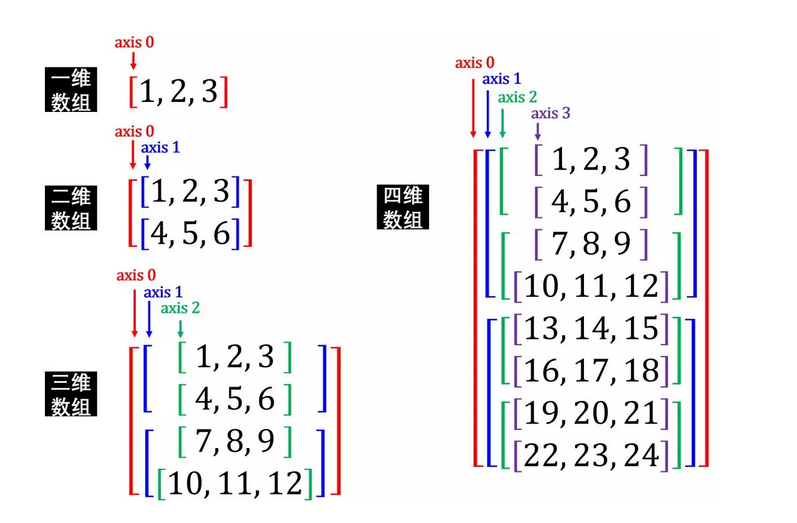

>规律：n 维数组就有 n 层方括号。最外层方括号代表「轴 0」即 axis=0，依次往里方括号对应的 axis 的计数加 1。
严格来说，numpy 打印出来的数组可以想象带有多层方括号的一行数字。比如二维矩阵可想象成

    [[1, 2, 3],[4, 5, 6]]
>三维矩阵可想象成

    [[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]]

>由于屏幕的宽度不够，我们才把它们写成一列列的，如下

    [ [ [1, 2, 3]
         [4, 5, 6] ] 
      [ [7, 8, 9] 
         [10, 11, 12] ] ]

>但在你脑海里，应该把它们想成一整行。这样会便于你理解如何按不同轴做整合运算。

有了轴的概念，我们再来看看 sum() 求和函数。

#### 一维数组

* 一维数组x

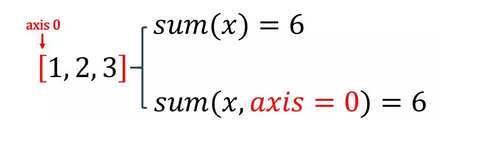
分析结果：

* 1, 2, 3 的总和是 6
* 在轴 0(只有一个轴) 上的元素求和是 6

用代码验证一下：

In [100]:
arr = np.array([1,2,3])
print( 'The total sum is', arr.sum() )
print( 'The sum on axis0 is', arr.sum(axis=0) )

The total sum is 6
The sum on axis0 is 6


#### 二维数组

* 二维数组x
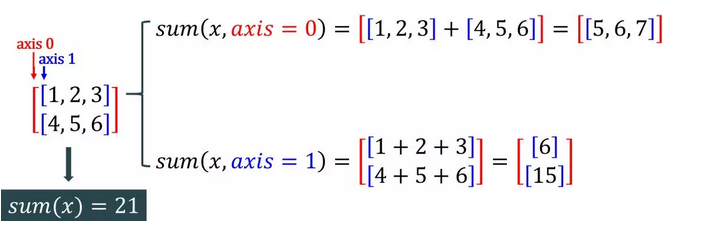
分析结果：

* 1 到 6 的总和是 6
* 轴 0 上的元素 (被一个红方括号[]包住的) 是[1, 2, 3]和[4, 5, 6]，求和得到[[5, 6, 7]]
* 轴 1 上的元素 (被两个蓝方括号[] 包住的) 分别是 1, 2, 3 和 4, 5, 6，求和得到 [[1+2+3, 4+5+6]]= [[6, 15]]

用代码验证一下：

In [102]:
arr = np.arange(1,7).reshape((2,3))
print( arr )

[[1 2 3]
 [4 5 6]]


print( 'The total sum is', arr.sum() )
print( 'The sum on axis0 is', arr.sum(axis=0) )
print( 'The sum on axis1 is', arr.sum(axis=1) )

结果是对的，但是好像括号比上图推导出来的少一个。原因np.sum()里面有个参数是 keepdims，意思是「保留维度」，默认值时 False，因此会去除多余的括号，比如 [[5, 7, 9]] 会变成 [5, 7, 9]。

如果把 keepdims 设置为 True，那么打印出来的结果和上图推导的一模一样。

In [104]:
print( arr.sum(axis=0, keepdims=True) )
print( arr.sum(axis=1, keepdims=True) )

[[5 7 9]]
[[ 6]
 [15]]


#### 三维数组
* 三维数组

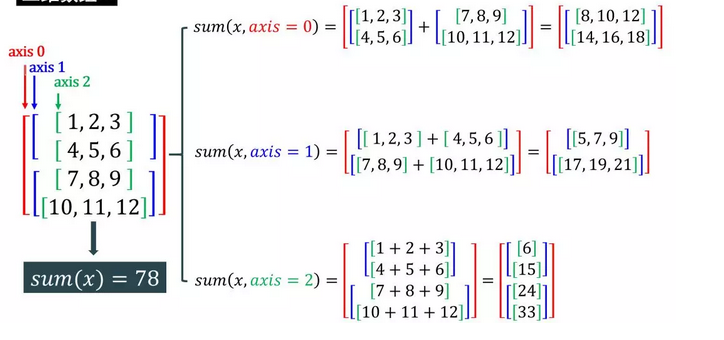

分析结果：

* 1 到 12 的总和是 78
* 轴 0 上的元素是一个红方括号[] 包住的两个 [[ ]]，对其求和得到一个 [ [[ ]] ]
* 轴 1 上的元素是两个蓝方括号[] 包住的两个[ ]，对其求和得到两个 [[ ]]，即 [ [[ ]], [[ ]] ]
* 轴 2 上的元素是四个绿方括号[] 包住的三个标量，对其求和得到四个[]，即 [ [[ ], [ ]], [[ ], [ ]] ]

用代码验证一下：

In [106]:
arr = np.arange(1,13).reshape((2,2,3))
print(arr)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [107]:
print( 'The total sum is', arr.sum() )
print( 'The sum on axis0 is', arr.sum(axis=0) )
print( 'The sum on axis1 is', arr.sum(axis=1) )
print( 'The sum on axis2 is', arr.sum(axis=2) )

The total sum is 78
The sum on axis0 is [[ 8 10 12]
 [14 16 18]]
The sum on axis1 is [[ 5  7  9]
 [17 19 21]]
The sum on axis2 is [[ 6 15]
 [24 33]]


打印出来的结果比上图推导结果少一个括号，也是因为 keepdims 默认为 False。


#### 四维数组

* 四维数组
![image.png](attachment:image.png)

不解释了，彩色括号画的人要抓狂了。通用规律：当在某根轴上求和，明晰该轴的元素，再求和。具体说来：

* 在轴 0上求和，它包含是两个[]，对其求和
* 在轴 1 上求和，它包含是两个 []，对其求和
* 在轴 2 上求和，它包含是两个 []，对其求和
* 在轴 3 上求和，它包含是三个标量，对其求和

用代码验证一下：

In [109]:
arr = np.arange(1,25).reshape((2,2,2,3))
print(arr)

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]


In [110]:
print( 'The total sum is', arr.sum() )
print( 'The sum on axis0 is', arr.sum(axis=0) )
print( 'The sum on axis1 is', arr.sum(axis=1) )
print( 'The sum on axis2 is', arr.sum(axis=2) )
print( 'The sum on axis3 is', arr.sum(axis=3) )

The total sum is 300
The sum on axis0 is [[[14 16 18]
  [20 22 24]]

 [[26 28 30]
  [32 34 36]]]
The sum on axis1 is [[[ 8 10 12]
  [14 16 18]]

 [[32 34 36]
  [38 40 42]]]
The sum on axis2 is [[[ 5  7  9]
  [17 19 21]]

 [[29 31 33]
  [41 43 45]]]
The sum on axis3 is [[[ 6 15]
  [24 33]]

 [[42 51]
  [60 69]]]


打印出来的结果比上图推导结果少一个括号，也是因为 keepdims 默认为 False。


### 小结

除了 sum 函数，整合函数还包括 min, max, mean, std 和 cumsum，分别是求最小值、最大值、均值、标准差和累加，这些函数对数组里的元素整合方式和 sum 函数相同，就不多讲了。总结来说我们可以对数组

* 所有的元素整合
* 在某个轴 (axis) 上的元素整合

整合函数= {sum, min, max, mean, std, cumsum}

### 5.4 广播机制计算
当对两个形状不同的数组按元素操作时，可能会触发「广播机制」。具体做法，先适当复制元素使得这两个数组形状相同后再按元素操作，两个步骤：

1. 广播轴 (broadcast axis)：比对两个数组的维度，将形状小的数组的维度 (轴) 补齐
2. 复制元素：顺着补齐的轴，将形状小的数组里的元素复制，使得最终形状和另一个数组吻合

在给出「广播机制」需要的严谨规则之前，我们先来看看几个简单例子。

#### 例一：标量和一维数组

In [111]:

arr = np.arange(5)
print( arr )
print( arr + 2 )

[0 1 2 3 4]
[2 3 4 5 6]


元素 2 被广播到数组 arr 的所有元素上。


#### 例二：一维数组和二维数组

In [113]:

arr = np.arange(12).reshape((4,3))
print( arr )
print( arr.mean(axis=0) )
print( arr - arr.mean(axis=0) )

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[4.5 5.5 6.5]
[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]


沿轴 0 的均值的一维数组被广播到数组 arr 的所有的行上。

现在我们来看看「广播机制」的规则：

#### 广播机制的规则
当我们对两个数组操作时，如果它们的形状

* 不相容 (incompatible)，广播机制不能进行
* 相容 (compatible)，广播机制可以进行

因此，进行广播机制分两步

检查两个数组形状是否兼容，即从两个形状元组最后一个元素，来检查

它们是否相等
是否有一个等于 1

一旦它们形状兼容，确定两个数组的最终形状。

#### 例三：维度一样，形状不一样
用个例子来应用以上广播机制规则

In [114]:
a = np.array([[1,2,3]])
b = np.array([[4],[5],[6]])
print( 'The shape of a is', a.shape )
print( 'The shape of b is', b.shape )

The shape of a is (1, 3)
The shape of b is (3, 1)


回顾进行广播机制的两步

1. 检查数组 a 和 b 形状是否兼容，从两个形状元组 (1, 3) 和 (3, 1)最后一个元素开始检查，发现它们都满足『有一个等于 1』的条件。

2. 因此它们形状兼容，两个数组的最终形状为 (max(1,3), max(3,1)) = (3, 3)

到此，a 和 b 被扩展成 (3, 3) 的数组，让我们看看 a + b 等于多少

In [115]:
c = a + b
print( 'The shape of c is', c.shape )
print( 'a is', a )
print( 'b is', b )
print( 'c = a + b =', c )

The shape of c is (3, 3)
a is [[1 2 3]]
b is [[4]
 [5]
 [6]]
c = a + b = [[5 6 7]
 [6 7 8]
 [7 8 9]]


#### 例四：维度不一样


In [116]:
a = np.arange(5)
b = np.array(2)
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b is', b.ndim, 'and the shape of b is', b.shape )

The dimension of a is 1 and the shape of a is (5,)
The dimension of b is 0 and the shape of b is ()


数组 a 和 b 形状分别为 (5,) 和 ()，首先我们把缺失的维度用 1 补齐得到 (5,) 和 (1,)，再根据广播机制那套流程得到这两个形状是兼容的，而且最终形状为 (5,)。

用代码来看看 a + b 等于多少

In [117]:

c = a + b
print( 'The dimension of c is', c.ndim, 'and the shape of c is', c.shape, '\n' )
print( 'a is', a )
print( 'b is', b )
print( 'c = a + b =', c )

The dimension of c is 1 and the shape of c is (5,) 

a is [0 1 2 3 4]
b is 2
c = a + b = [2 3 4 5 6]


现在对广播机制有概念了吧，来趁热打铁搞清楚下面这五个例子，你就完全弄懂它了。

In [118]:
a = np.array( [[[1,2,3], [4,5,6]]] )
b1 = np.array( [[1,1,1], [2,2,2], [3,3,3]] )
b2 = np.arange(3).reshape((1,3))
b3 = np.arange(6).reshape((2,3))
b4 = np.arange(12).reshape((2,2,3))
b5 = np.arange(6).reshape((2,1,3))
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b1 is', b.ndim, 'and the shape of b1 is', b1.shape, '\n')
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b2 is', b.ndim, 'and the shape of b2 is', b2.shape, '\n' )
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b3 is', b.ndim, 'and the shape of b3 is', b3.shape, '\n' )
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b4 is', b.ndim, 'and the shape of b4 is', b4.shape, '\n' )
print( 'The dimension of a is', a.ndim, 'and the shape of a is', a.shape )
print( 'The dimension of b5 is', b.ndim, 'and the shape of b5 is', b5.shape )

The dimension of a is 3 and the shape of a is (1, 2, 3)
The dimension of b1 is 0 and the shape of b1 is (3, 3) 

The dimension of a is 3 and the shape of a is (1, 2, 3)
The dimension of b2 is 0 and the shape of b2 is (1, 3) 

The dimension of a is 3 and the shape of a is (1, 2, 3)
The dimension of b3 is 0 and the shape of b3 is (2, 3) 

The dimension of a is 3 and the shape of a is (1, 2, 3)
The dimension of b4 is 0 and the shape of b4 is (2, 2, 3) 

The dimension of a is 3 and the shape of a is (1, 2, 3)
The dimension of b5 is 0 and the shape of b5 is (2, 1, 3)


对于数组 a 和 b1，它们形状是 (1, 2, 3) 和 (3, 3)。元组最后一个都是 3，兼容；倒数第二个是 3 和 2，即不相等，也没有一个是 1，不兼容！a 和 b1 不能进行广播机制。不行就看看下面代码：

In [119]:
c1 = a + b1
print( c1 )
print( c1.shape )

ValueError: operands could not be broadcast together with shapes (1,2,3) (3,3) 

a 和其他 b2, b3, b4, b5 都可以进行广播机制

In [120]:

c2 = a + b2
print( c2 )
print( c2.shape )

[[[1 3 5]
  [4 6 8]]]
(1, 2, 3)


In [121]:
c3 = a + b3
print( c3 )
print( c3.shape )

[[[ 1  3  5]
  [ 7  9 11]]]
(1, 2, 3)


In [122]:
c4 = a + b4
print( c4 )
print( c4.shape )

[[[ 1  3  5]
  [ 7  9 11]]

 [[ 7  9 11]
  [13 15 17]]]
(2, 2, 3)


In [123]:

c5 = a + b5
print( c5 )
print( c5.shape )

[[[ 1  3  5]
  [ 4  6  8]]

 [[ 4  6  8]
  [ 7  9 11]]]
(2, 2, 3)


## 总结
NumPy 篇终于完结！即上贴讨论过的数组创建、数组存载和数组获取，本贴讨论了数组变形、数组计算。

数组变形有以下重要操作：

* 改变维度的重塑和打平
* 改变分合的合并和分裂
* 复制本质的重复和拼接
* 其他排序插入删除复制

数组计算有以下重要操作：

1. 元素层面：四则运算、函数，比较
2. 线性代数：务必弄懂点乘函数 dot()
3. 元素整合：务必弄懂轴这个概念！
4. 广播机制：太重要了，神经网络无处不在！

下篇讨论用于科学计算的 SciPy